In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import os

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import datasets, layers, models, callbacks
import matplotlib.pyplot as plt

import PIL
import PIL.Image
import glob
import skimage
from PIL import Image
from skimage import io, color

import numpy as np
import pandas as pd
import cv2 
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D, AveragePooling2D
from keras.layers import Flatten,Dense, Dropout

from sklearn.model_selection import train_test_split

from tensorflow.keras.callbacks import ModelCheckpoint



In [ ]:
classes = ['Centerstack','Forward','Left_wing_mirror','Rearview_mirror','Right_wing_mirror']

In [ ]:
num_classes = len(classes)
print(num_classes)

5


(640, 480)
(640, 480)
(640, 480)
(640, 480)
(640, 480)


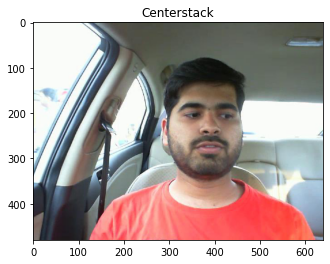

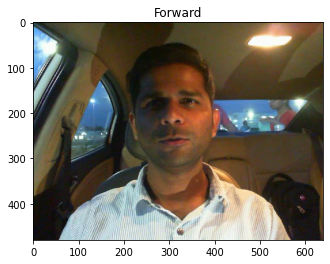

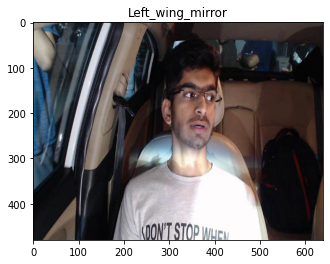

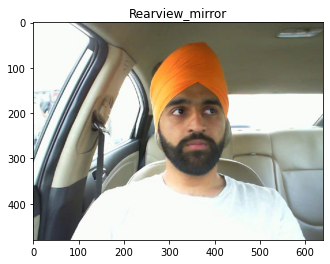

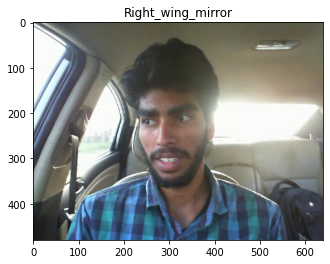

In [ ]:
# shows image size as well as images

train_root ='/content/drive/MyDrive/Dataset/gaze_dataset/train'


for i in classes:
  path = os.path.join(train_root,i,'*')
  path = glob.glob(path)
  id = np.random.choice(10)
  image = io.imread(path[id])
  imgs = Image.open(path[id]) 
  print(imgs.size)

  
  fig, ax = plt.subplots()
  
  ax.set_title(i)
  fig.set_figwidth(10)
  ax.imshow(image)
  

**Face Extraction**

In [ ]:
%cd "/content/drive/MyDrive/Dataset/gaze_dataset/train/face"

/content/drive/MyDrive/gaze_dataset/train/Face


In [ ]:
for c in classes:
  os.mkdir(c)

In [ ]:
train_root ="/content/drive/MyDrive/Dataset/gaze_dataset/train"

for i in classes:
  pt = os.path.join(train_root,'Face',i)
  os.chdir(pt)

  path = os.path.join(train_root,i,'*')
  path = glob.glob(path)

  
  for ip in path:
    fN = ip.split("/")[-1]

    modelFile = "/content/drive/MyDrive/Dataset/gaze_dataset/weights.caffemodel"
    configFile = "/content/drive/MyDrive/Dataset/gaze_dataset/deploy.prototxt.txt"
    net = cv2.dnn.readNetFromCaffe(configFile, modelFile)
    img = cv2.imread(ip)
    h, w = img.shape[:2]
    blob = cv2.dnn.blobFromImage(cv2.resize(img, (300, 300)), 1.0, (300, 300), (104.0, 117.0, 123.0))
    net.setInput(blob)
    faces = net.forward()
    #to draw faces on image
    for i in range(faces.shape[2]):
            confidence = faces[0, 0, i, 2]
            if confidence > 0.5:
                box = faces[0, 0, i, 3:7] * np.array([w, h, w, h])
                (x, y, x1, y1) = box.astype("int")
                cv2.rectangle(img, (x, y), (x1, y1), (0, 0, 255), 2)
                roi_color = img[y:y1, x:x1]

    cv2.imwrite(fN+'_face.jpg', roi_color)
    # image = cv2.imread(ip)
    # gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")
    # faces = faceCascade.detectMultiScale(
    #     gray,
    #     scaleFactor=1.3,
    #     minNeighbors=3,
    #     minSize=(30, 30)
    # )

    # for (x, y, w, h) in faces:
    #   cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
    #   roi_color = image[y:y + h, x:x + w]
    # cv2.imwrite(fN+'_face.jpg', roi_color)
      

**Resizing images**

In [ ]:
train_root = "/content/drive/MyDrive/gaze_dataset/train/face"

for i in classes:
  path = os.path.join(train_root,i,'*')
  path = glob.glob(path)
  for p in path:
    img = Image.open(p)
    img = img.resize((256,256))
    img.save(p)
  

(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)


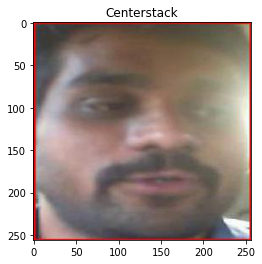

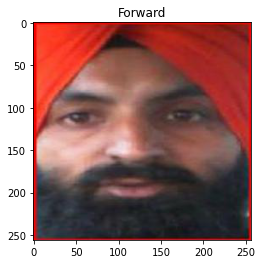

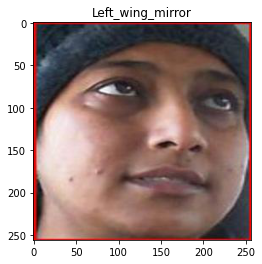

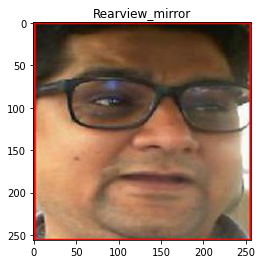

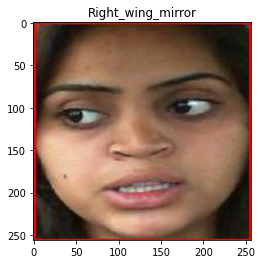

In [ ]:
# shows images of face extracted 

train_root ='/content/drive/MyDrive/gaze_dataset/train/face'


for i in classes:
  path = os.path.join(train_root,i,'*')
  path = glob.glob(path)
  id = np.random.choice(10)
  image = io.imread(path[id])
  imgs = Image.open(path[id]) 
  print(imgs.size)

  
  fig, ax = plt.subplots()
  
  ax.set_title(i)
  fig.set_figwidth(10)
  ax.imshow(image)

**extracting faces for testing**

In [ ]:
path = '/content/drive/MyDrive/Dataset/gaze_dataset/test'

files = glob.glob("/content/drive/MyDrive/Dataset/gaze_dataset/test/*.jpg")

files.sort()

In [ ]:
os.chdir("/content/drive/MyDrive/Dataset/gaze_dataset/face_test")

for ip in files:

  fN = ip.split("/")[-1]

  image = cv2.imread(ip)

  modelFile = "/content/drive/MyDrive/Dataset/gaze_dataset/weights.caffemodel"
  configFile = "/content/drive/MyDrive/Dataset/gaze_dataset/deploy.prototxt.txt"
  net = cv2.dnn.readNetFromCaffe(configFile, modelFile)
  img = cv2.imread(ip)
  h, w = img.shape[:2]
  blob = cv2.dnn.blobFromImage(cv2.resize(img, (300, 300)), 1.0,
  (300, 300), (104.0, 117.0, 123.0))
  net.setInput(blob)
  faces = net.forward()
  #to draw faces on image
  for i in range(faces.shape[2]):
          confidence = faces[0, 0, i, 2]
          if confidence > 0.5:
              box = faces[0, 0, i, 3:7] * np.array([w, h, w, h])
              (x, y, x1, y1) = box.astype("int")
              cv2.rectangle(img, (x, y), (x1, y1), (0, 0, 255), 2)
              roi_color = img[y:y1, x:x1]

  cv2.imwrite(fN, roi_color)
  # gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

  # faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")
  # faces = faceCascade.detectMultiScale(
  #     gray,
  #     scaleFactor=1.3,
  #     minNeighbors=3,
  #     minSize=(30, 30)
  # )

  # for (x, y, w, h) in faces:
  #   cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
  #   roi_color = image[y:y + h, x:x + w]
  #   cv2.imwrite(fN+'.jpg', roi_color)

In [ ]:
print(len(os.listdir("/content/drive/MyDrive/Dataset/gaze_dataset/face_test")))

509
